# Module 2: Bayesian Network - Demo 3: Spam Filtering

In [1]:
#Import Bayesian Model
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

### Defining the model structure by passing a list of edges

In [2]:
#Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('Special_Character','Spam_Keyword'),
                       ('Email_Client','Spam_Keyword'), 
                       ('Spam_Keyword', 'Spam_Email'),
                       ('Email_Client', 'Suspicious_Email_Link')])


In [3]:
model.nodes()

['Special_Character',
 'Spam_Keyword',
 'Email_Client',
 'Spam_Email',
 'Suspicious_Email_Link']

In [4]:
model.edges()

[('Special_Character', 'Spam_Keyword'),
 ('Spam_Keyword', 'Spam_Email'),
 ('Email_Client', 'Spam_Keyword'),
 ('Email_Client', 'Suspicious_Email_Link')]

### Define CPD's for all the nodes and add them to the network

In [5]:
# Defining individual CPDs
cpd_Characters = TabularCPD(variable='Special_Character',variable_card=2,values=[[0.6, 0.4]])
cpd_Email_Client = TabularCPD(variable='Email_Client',variable_card=2, values=[[0.7, 0.3]])
cpd_Keyword = TabularCPD(variable='Spam_Keyword', 
                         variable_card=3, 
                         values=[[0.3, 0.05, 0.9,  0.5],
                                 [0.4, 0.25, 0.08, 0.3],
                                 [0.3, 0.7,  0.02, 0.2]],
                          evidence=['Email_Client', 'Special_Character'],
                          evidence_card=[2, 2])
cpd_Spam_Email = TabularCPD(variable='Spam_Email', 
                            variable_card=2, 
                            values=[[0.1, 0.4, 0.99],
                                    [0.9, 0.6, 0.01]],
                            evidence=['Spam_Keyword'],
                            evidence_card=[3])
cpd_Link_Suspicious = TabularCPD(variable='Suspicious_Email_Link', 
                                 variable_card=2,
                                 values=[[0.95, 0.2],
                                         [0.05, 0.8]],
                                 evidence=['Email_Client'],
                                 evidence_card=[2])


In [6]:
# Associating the CPDs with the network
model.add_cpds(cpd_Characters, cpd_Email_Client, cpd_Keyword, cpd_Spam_Email, cpd_Link_Suspicious)
model.get_cpds()

[<TabularCPD representing P(Special_Character:2) at 0x7f19f153e2e8>,
 <TabularCPD representing P(Email_Client:2) at 0x7f1a4406d898>,
 <TabularCPD representing P(Spam_Keyword:3 | Email_Client:2, Special_Character:2) at 0x7f19f153e358>,
 <TabularCPD representing P(Spam_Email:2 | Spam_Keyword:3) at 0x7f1a4406d2e8>,
 <TabularCPD representing P(Suspicious_Email_Link:2 | Email_Client:2) at 0x7f19f153e2b0>]

In [7]:
#Check the cpds for all the nodes
print(model.get_cpds('Email_Client'))
print(model.get_cpds('Spam_Keyword'))
print(model.get_cpds('Spam_Email'))
print(model.get_cpds('Special_Character'))
print(model.get_cpds('Suspicious_Email_Link'))


+----------------+-----+
| Email_Client_0 | 0.7 |
+----------------+-----+
| Email_Client_1 | 0.3 |
+----------------+-----+
+-------------------+---------------------+---------------------+---------------------+---------------------+
| Email_Client      | Email_Client_0      | Email_Client_0      | Email_Client_1      | Email_Client_1      |
+-------------------+---------------------+---------------------+---------------------+---------------------+
| Special_Character | Special_Character_0 | Special_Character_1 | Special_Character_0 | Special_Character_1 |
+-------------------+---------------------+---------------------+---------------------+---------------------+
| Spam_Keyword_0    | 0.3                 | 0.05                | 0.9                 | 0.5                 |
+-------------------+---------------------+---------------------+---------------------+---------------------+
| Spam_Keyword_1    | 0.4                 | 0.25                | 0.08                | 0.3              

### Cardinality of Node

In [8]:
# Cardinality - Number of nodes that a given node is connected with in a network
model.get_cardinality('Spam_Keyword')


3

### Local Independencies

In [9]:
#Getting the local independencies of a variable.
model.local_independencies('Spam_Keyword')

(Spam_Keyword _|_ Suspicious_Email_Link | Special_Character, Email_Client)

In [10]:
#Getting all the local independencies in the network.
model.local_independencies(['Special_Character','Email_Client', 'Suspicious_Email_Link', 'Spam_Keyword', 'Spam_Email'])

(Special_Character _|_ Suspicious_Email_Link, Email_Client)
(Email_Client _|_ Special_Character)
(Suspicious_Email_Link _|_ Special_Character, Spam_Email, Spam_Keyword | Email_Client)
(Spam_Keyword _|_ Suspicious_Email_Link | Special_Character, Email_Client)
(Spam_Email _|_ Special_Character, Suspicious_Email_Link, Email_Client | Spam_Keyword)

### Active trail

In [11]:
#If any change in Node A influences values of Node B then we say that there is an active trail between A and B.
model.active_trail_nodes('Special_Character')

{'Special_Character': {'Spam_Email', 'Spam_Keyword', 'Special_Character'}}

In [12]:
model.active_trail_nodes('Special_Character',observed ='Suspicious_Email_Link')

{'Special_Character': {'Spam_Email', 'Spam_Keyword', 'Special_Character'}}

### Model consistency

In [13]:
model.check_model()

True

### Graphical Representation of network

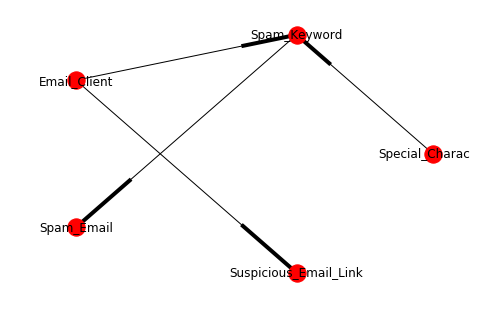

In [14]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import networkx as nx
nx.draw_shell(model,with_labels=True)
plt.show()